Synthetic EHR log dataset created with updated events and AI adoption rates.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display first few rows
print(df.head())

# Optional: see summary info
print(df.info())
print(df.describe())


     event_id user_id   specialty session_id                timestamp  \
0  Doc_1_S1_1   Doc_1  Cardiology   Doc_1_S1  2025-11-08 00:10:42.249   
1  Doc_1_S1_2   Doc_1  Cardiology   Doc_1_S1  2025-11-08 00:11:24.485   
2  Doc_1_S1_3   Doc_1  Cardiology   Doc_1_S1  2025-11-08 00:13:05.748   
3  Doc_1_S1_4   Doc_1  Cardiology   Doc_1_S1  2025-11-08 00:13:42.421   
4  Doc_1_S1_5   Doc_1  Cardiology   Doc_1_S1  2025-11-08 00:14:14.110   

            event_type        page_name  action_time_ms  ai_scribe_used  \
0  documentation_start        Encounter        295249.0            True   
1                click            Notes         42236.0           False   
2                click           Orders        101263.0           False   
3           navigation        Encounter         36673.0            True   
4  ai_generate_summary  Patient Summary         31689.0            True   

   after_hours_flag  feature_adoption_flag  workflow_efficiency_score  
0              True                   

In [48]:
# Check data types and convert if necessary
print(df.dtypes)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates based on event_id
duplicates = df[df.duplicated(subset=['event_id'], keep=False)]
print(f"Number of duplicates: {duplicates.shape[0]}")

# Check the first few rows to see the format of the timestamp
print(df.head())

# Ensure that timestamps are in chronological order within each session
out_of_order = df.sort_values(by=['session_id', 'timestamp'], ascending=[True, True]).duplicated(subset=['session_id'], keep=False)
out_of_order_events = df[out_of_order]
print(f"Out of order events:\n {out_of_order_events}")


event_id                      object
user_id                       object
specialty                     object
session_id                    object
timestamp                     object
event_type                    object
page_name                     object
action_time_ms               float64
ai_scribe_used                  bool
after_hours_flag                bool
feature_adoption_flag           bool
workflow_efficiency_score    float64
dtype: object
Missing Values:
 event_id                        0
user_id                         0
specialty                       0
session_id                      0
timestamp                       0
event_type                      0
page_name                    1363
action_time_ms               1360
ai_scribe_used                  0
after_hours_flag                0
feature_adoption_flag           0
workflow_efficiency_score       0
dtype: int64
Number of duplicates: 1356
     event_id user_id   specialty session_id                timestamp  \
0  D

C:\Users\NAWAB AHMAD\AppData\Local\Temp\ipykernel_2744\473495624.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_of_order_events = df[out_of_order]


In [49]:
# Fill missing values for `page_name` using forward fill (because it's categorical)
df['page_name'].fillna(method='ffill', inplace=True)

# Fill missing values for `action_time_ms` with the median value (because it's numeric)
df['action_time_ms'].fillna(df['action_time_ms'].median(), inplace=True)

# Check if the missing values are resolved
print(df.isnull().sum())


event_id                     0
user_id                      0
specialty                    0
session_id                   0
timestamp                    0
event_type                   0
page_name                    0
action_time_ms               0
ai_scribe_used               0
after_hours_flag             0
feature_adoption_flag        0
workflow_efficiency_score    0
dtype: int64


In [50]:
# Drop duplicate rows based on `event_id`, keeping the first occurrence
df.drop_duplicates(subset=['event_id'], keep='first', inplace=True)

# Check if duplicates were removed
print(f"Dataframe shape after removing duplicates: {df.shape}")


Dataframe shape after removing duplicates: (135628, 12)


In [51]:
# Convert the 'timestamp' column to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by session_id and timestamp to ensure chronological order within each session
df.sort_values(by=['session_id', 'timestamp'], inplace=True)

# Verify that the data is now sorted
print(df.head())


            event_id  user_id        specialty  session_id  \
134582  Doc_100_S1_1  Doc_100  Family Medicine  Doc_100_S1   
134583  Doc_100_S1_2  Doc_100  Family Medicine  Doc_100_S1   
134584  Doc_100_S1_3  Doc_100  Family Medicine  Doc_100_S1   
134585  Doc_100_S1_4  Doc_100  Family Medicine  Doc_100_S1   
134586  Doc_100_S1_5  Doc_100  Family Medicine  Doc_100_S1   

                     timestamp           event_type        page_name  \
134582 2025-11-02 12:45:53.993                click  Patient Summary   
134583 2025-11-02 12:46:20.719  ai_generate_summary  Patient Summary   
134584 2025-11-02 12:47:09.501                click            Notes   
134585 2025-11-02 12:48:58.389                click  Patient Summary   
134586 2025-11-02 12:49:41.246  ai_error_correction            Notes   

        action_time_ms  ai_scribe_used  after_hours_flag  \
134582         34548.5           False             False   
134583         26726.0            True             False   
134584        

## Feature Engineering

## Calculate Document Time per Visit

In [74]:
# Exclude sessions with missing documentation events
valid_sessions_df = df.dropna(subset=['doc_time_per_visit'])

# Now proceed with analysis on valid sessions
print(valid_sessions_df[['session_id', 'event_type', 'doc_time_per_visit']].head(20))  # Show first 20 rows


     session_id           event_type  doc_time_per_visit
36   Doc_100_S1    documentation_end           16.375033
37   Doc_100_S1    documentation_end           16.375033
38   Doc_100_S1    documentation_end           16.375033
39   Doc_100_S1    documentation_end           16.375033
40   Doc_100_S1    documentation_end           16.375033
41   Doc_100_S1    documentation_end           16.375033
66   Doc_100_S1  documentation_start           16.375033
67   Doc_100_S1  documentation_start           16.375033
68   Doc_100_S1  documentation_start           16.375033
69   Doc_100_S1  documentation_start           16.375033
70   Doc_100_S1  documentation_start           16.375033
71   Doc_100_S1  documentation_start           16.375033
186  Doc_100_S1  documentation_start           16.375033
187  Doc_100_S1  documentation_start           16.375033
188  Doc_100_S1  documentation_start           16.375033
189  Doc_100_S1  documentation_start           16.375033
190  Doc_100_S1  documentation_

In [75]:
# Filter the dataframe to show only documentation events (documentation_start and documentation_end)
documentation_events = df[df['event_type'].isin(['documentation_start', 'documentation_end'])]

# Check for sessions with missing either documentation_start or documentation_end
sessions_with_missing_events = documentation_events.groupby('session_id').filter(
    lambda x: not ('documentation_start' in x['event_type'].values and 'documentation_end' in x['event_type'].values)
)

# Show sessions with missing events
print(f"Sessions with missing documentation events:\n{sessions_with_missing_events[['session_id', 'event_type']].drop_duplicates()}")

# Now, proceed to calculate document time for sessions that have both 'documentation_start' and 'documentation_end'
doc_times = []

# Loop through each session to calculate the document time
for session_id, group in documentation_events.groupby('session_id'):
    # Check if both 'documentation_start' and 'documentation_end' exist in the session
    if 'documentation_start' in group['event_type'].values and 'documentation_end' in group['event_type'].values:
        # Get the first 'documentation_start' and last 'documentation_end' timestamps
        doc_start = group[group['event_type'] == 'documentation_start']['timestamp'].iloc[0]
        doc_end = group[group['event_type'] == 'documentation_end']['timestamp'].iloc[-1]
        
        # Check if documentation_end is earlier than documentation_start
        if doc_end < doc_start:
            # Reverse the subtraction and take absolute value
            doc_time = abs((doc_end - doc_start).total_seconds()) / 60  # Use absolute time difference in minutes
        else:
            # Calculate the document time normally
            doc_time = (doc_end - doc_start).total_seconds() / 60  # Convert to minutes
        
        # Store the document time for the session
        doc_times.append((session_id, doc_time))

# Create a dictionary to map session_id to doc_time
doc_time_dict = dict(doc_times)

# Apply the document time to all events within the session, but only for documentation_start and documentation_end events
df['doc_time_per_visit'] = df.apply(
    lambda row: doc_time_dict.get(row['session_id']) if row['event_type'] in ['documentation_start', 'documentation_end'] else None, 
    axis=1
)

# Verify the result
documentation_events = df[df['event_type'].isin(['documentation_start', 'documentation_end'])]  # Filter only documentation events

# Display unique sessions with documentation events and their doc_time_per_visit
print(documentation_events[['session_id', 'event_type', 'doc_time_per_visit']].drop_duplicates())


Sessions with missing documentation events:
          session_id           event_type
813      Doc_100_S14    documentation_end
1388     Doc_100_S18  documentation_start
1792     Doc_100_S20  documentation_start
2943     Doc_100_S26    documentation_end
4822     Doc_100_S32    documentation_end
...              ...                  ...
1325949   Doc_99_S52    documentation_end
1329452    Doc_9_S17    documentation_end
1330932    Doc_9_S23    documentation_end
1335998     Doc_9_S4  documentation_start
1339486    Doc_9_S47    documentation_end

[335 rows x 2 columns]
          session_id           event_type  doc_time_per_visit
36        Doc_100_S1    documentation_end           16.375033
66        Doc_100_S1  documentation_start           16.375033
284      Doc_100_S10  documentation_start           12.168567
296      Doc_100_S10    documentation_end           12.168567
377      Doc_100_S11    documentation_end           11.429800
...              ...                  ...               

In [76]:
# Summarize the total document time per session
session_doc_time = valid_sessions_df.groupby('session_id')['doc_time_per_visit'].sum()

# Display the total document time per session
print(session_doc_time.head(20))  # Show first 20 sessions for validation


session_id
Doc_100_S1      589.501200
Doc_100_S10     194.697067
Doc_100_S11     925.813800
Doc_100_S12      17.468700
Doc_100_S13     429.567000
Doc_100_S15      32.474667
Doc_100_S16      50.883450
Doc_100_S17    3960.073883
Doc_100_S19     104.152533
Doc_100_S2     2551.495000
Doc_100_S21    2837.815000
Doc_100_S22     690.294000
Doc_100_S23       5.512500
Doc_100_S24    2885.755200
Doc_100_S25     158.070000
Doc_100_S27      28.758933
Doc_100_S28    4088.846400
Doc_100_S29      14.315550
Doc_100_S3     3181.852800
Doc_100_S30    1036.728000
Name: doc_time_per_visit, dtype: float64


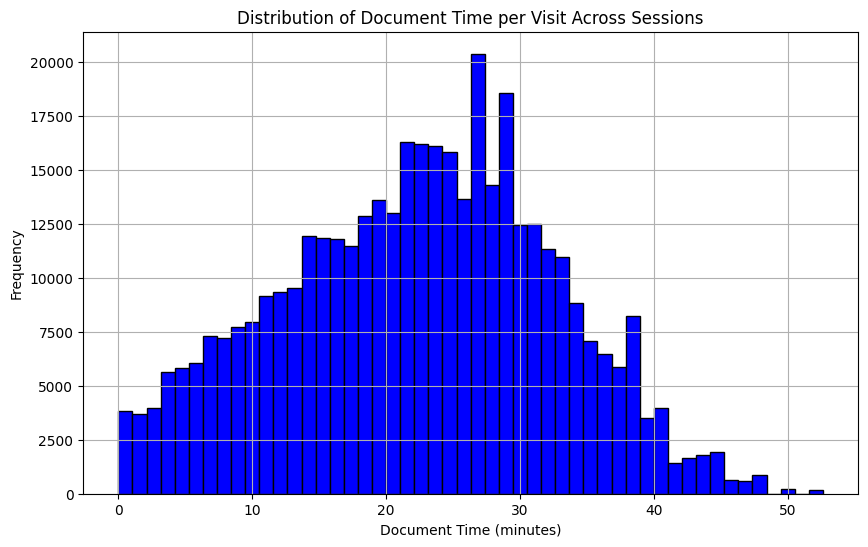

In [77]:
import matplotlib.pyplot as plt

# Plot a histogram of the document times for all sessions
plt.figure(figsize=(10, 6))
plt.hist(valid_sessions_df['doc_time_per_visit'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Document Time per Visit Across Sessions')
plt.xlabel('Document Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


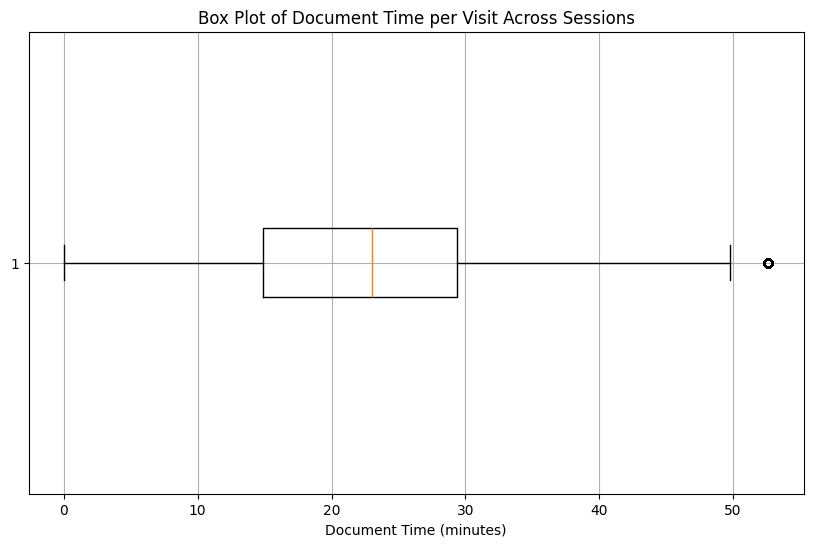

In [78]:
# Plot a box plot of document times across sessions
plt.figure(figsize=(10, 6))
plt.boxplot(valid_sessions_df['doc_time_per_visit'], vert=False)
plt.title('Box Plot of Document Time per Visit Across Sessions')
plt.xlabel('Document Time (minutes)')
plt.grid(True)
plt.show()


In [79]:
# Calculate the IQR (Interquartile Range)
Q1 = valid_sessions_df['doc_time_per_visit'].quantile(0.25)
Q3 = valid_sessions_df['doc_time_per_visit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = valid_sessions_df[(valid_sessions_df['doc_time_per_visit'] < lower_bound) |
                             (valid_sessions_df['doc_time_per_visit'] > upper_bound)]

# Show outliers
print(outliers[['session_id', 'doc_time_per_visit']])


        session_id  doc_time_per_visit
212809  Doc_23_S40           52.633917
212810  Doc_23_S40           52.633917
212811  Doc_23_S40           52.633917
212812  Doc_23_S40           52.633917
212813  Doc_23_S40           52.633917
...            ...                 ...
213441  Doc_23_S40           52.633917
213442  Doc_23_S40           52.633917
213443  Doc_23_S40           52.633917
213444  Doc_23_S40           52.633917
213445  Doc_23_S40           52.633917

[169 rows x 2 columns]


In [80]:
# Cap the outliers at the 95th percentile
cap_value = valid_sessions_df['doc_time_per_visit'].quantile(0.95)
valid_sessions_df['doc_time_per_visit'] = valid_sessions_df['doc_time_per_visit'].clip(upper=cap_value)

# Verify the result after capping outliers
print(valid_sessions_df[['session_id', 'doc_time_per_visit']].head(20))


     session_id  doc_time_per_visit
36   Doc_100_S1           16.375033
37   Doc_100_S1           16.375033
38   Doc_100_S1           16.375033
39   Doc_100_S1           16.375033
40   Doc_100_S1           16.375033
41   Doc_100_S1           16.375033
66   Doc_100_S1           16.375033
67   Doc_100_S1           16.375033
68   Doc_100_S1           16.375033
69   Doc_100_S1           16.375033
70   Doc_100_S1           16.375033
71   Doc_100_S1           16.375033
186  Doc_100_S1           16.375033
187  Doc_100_S1           16.375033
188  Doc_100_S1           16.375033
189  Doc_100_S1           16.375033
190  Doc_100_S1           16.375033
191  Doc_100_S1           16.375033
204  Doc_100_S1           16.375033
205  Doc_100_S1           16.375033


C:\Users\NAWAB AHMAD\AppData\Local\Temp\ipykernel_2744\521493280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sessions_df['doc_time_per_visit'] = valid_sessions_df['doc_time_per_visit'].clip(upper=cap_value)


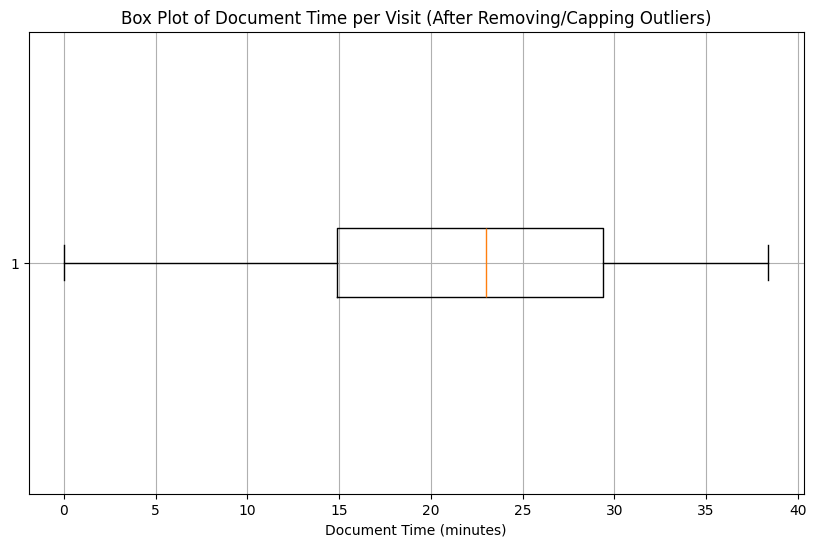

In [81]:
# Plot a box plot of the document times across sessions (after handling outliers)
plt.figure(figsize=(10, 6))
plt.boxplot(valid_sessions_df['doc_time_per_visit'], vert=False)
plt.title('Box Plot of Document Time per Visit (After Removing/Capping Outliers)')
plt.xlabel('Document Time (minutes)')
plt.grid(True)
plt.show()


## Calculate AI Usage Rate per Session

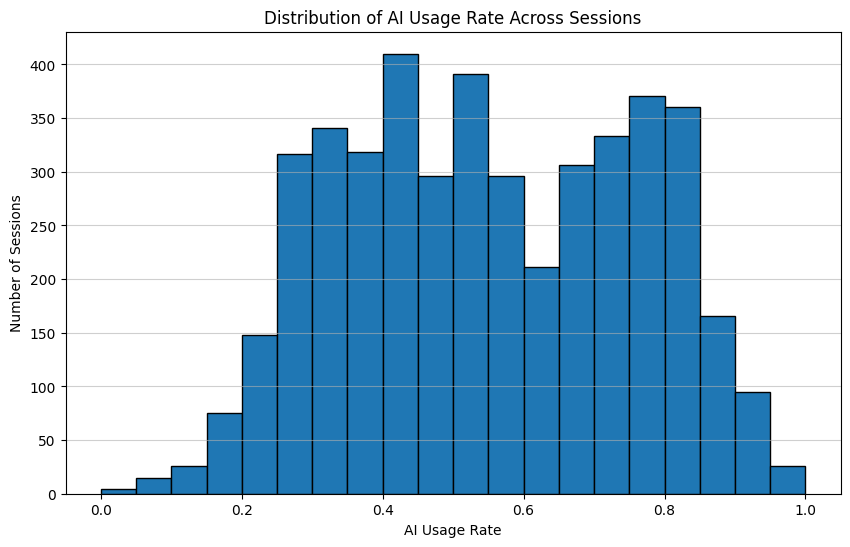

In [91]:
import matplotlib.pyplot as plt

# Calculate AI usage rate per session (proportion of AI used events per session)
df['ai_usage_rate'] = df.groupby('session_id')['ai_scribe_used'].transform('mean')


# Get unique sessions with ai_usage_rate
unique_sessions = df[['session_id', 'ai_usage_rate']].drop_duplicates()

# Sort by ai_usage_rate for cleaner visualization
unique_sessions = unique_sessions.sort_values('ai_usage_rate')

plt.figure(figsize=(10, 6))
plt.hist(unique_sessions['ai_usage_rate'], bins=20, edgecolor='black')
plt.xlabel('AI Usage Rate')
plt.ylabel('Number of Sessions')
plt.title('Distribution of AI Usage Rate Across Sessions')
plt.grid(axis='y', alpha=0.6)
plt.show()



## Number of click events per session_id

In [101]:
# One row per session: session_id + total clicks in that session
session_clicks = (
    df[['session_id', 'clicks_per_visit']]
    .drop_duplicates()           # keep one row per session
    .sort_values('clicks_per_visit', ascending=False)  # optional: sort by clicks
)

print(session_clicks.head(4520))   # show first 20 sessions


         session_id  clicks_per_visit
758384    Doc_5_S44               234
1282940  Doc_96_S52               221
421158    Doc_38_S8               208
707076    Doc_56_S5               198
1230686  Doc_92_S37               196
...             ...               ...
374705   Doc_35_S18                 0
160598   Doc_20_S23                 0
790543   Doc_62_S29                 0
1176826  Doc_89_S15                 0
724174   Doc_57_S50                 0

[4505 rows x 2 columns]


## session_duration_min

In [105]:
import pandas as pd

# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

def safe_session_duration(timestamps):
    # guard in case everything is NaT (shouldn't happen, but safe)
    if timestamps.isna().all():
        return pd.NA
    
    delta = timestamps.max() - timestamps.min()
    # absolute value just in case of any weird corruption
    return abs(delta.total_seconds()) / 60

# Compute session duration in minutes per session
df['session_duration_min'] = (
    df.groupby('session_id')['timestamp']
      .transform(safe_session_duration)
)

# Quick sanity check: one row per session
session_durations = (
    df[['session_id', 'session_duration_min']]
      .drop_duplicates()
      .sort_values('session_duration_min', ascending=False)
)

print(session_durations.head(3120))


         session_id  session_duration_min
897512    Doc_6_S29             61.308883
274260   Doc_27_S27             55.523033
1068149  Doc_81_S15             54.992567
947440   Doc_72_S50             54.944900
157118   Doc_20_S17             54.356433
...             ...                   ...
721107   Doc_57_S42             16.966483
1006617  Doc_77_S36             16.963783
1222984   Doc_91_S9             16.963017
698249   Doc_56_S19             16.959717
571166   Doc_48_S20             16.952250

[3120 rows x 2 columns]


## Session-Level Fact Table (`sessions_df`)

**Goal:** Convert raw event-level logs into a session-level fact table (one row = one visit/session).

**What I did here:**
- Grouped by `session_id` to aggregate all events in a session.
- Kept the main session attributes:
  - `user_id` (doctor) and `specialty` using the first value.
  - `session_start` = first event timestamp in the session.
  - `session_end` = last event timestamp in the session.
- Brought in session-level metrics already engineered at event level:
  - `session_duration_min` (total EHR time for the visit)
  - `doc_time_per_visit` (total documentation time for the visit)
  - `ai_usage_rate` (fraction of events using AI)
  - `clicks_per_visit` (total clicks in the session)
- Added `session_date` to enable time-based analysis (trends, adoption over time).


In [108]:
import pandas as pd

# 1) Make sure timestamp is datetime (safe even if already done)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2) Build session-level fact table
sessions_df = (
    df.groupby('session_id', as_index=False)
      .agg(
          user_id=('user_id', 'first'),                 # which doctor
          specialty=('specialty', 'first'),             # doctor's specialty
          session_start=('timestamp', 'min'),           # first event time
          session_end=('timestamp', 'max'),             # last event time
          session_duration_min=('session_duration_min', 'max'),  # same within session
          doc_time_per_visit=('doc_time_per_visit', 'max'),      # same within session
          ai_usage_rate=('ai_usage_rate', 'mean'),      # same within session
          clicks_per_visit=('clicks_per_visit', 'max')  # same within session
      )
)

# 3) Optional: add a session_date column for later time-based analysis
sessions_df['session_date'] = sessions_df['session_start'].dt.date

# 4) Inspect first few sessions
print(sessions_df.head(210))


      session_id  user_id        specialty           session_start  \
0     Doc_100_S1  Doc_100  Family Medicine 2025-11-02 12:45:53.993   
1    Doc_100_S10  Doc_100  Family Medicine 2025-11-06 20:41:56.293   
2    Doc_100_S11  Doc_100  Family Medicine 2025-11-07 19:47:23.213   
3    Doc_100_S12  Doc_100  Family Medicine 2025-11-12 22:54:48.425   
4    Doc_100_S13  Doc_100  Family Medicine 2025-11-12 08:11:06.419   
..           ...      ...              ...                     ...   
205    Doc_13_S5   Doc_13       Cardiology 2025-11-14 23:58:20.756   
206    Doc_13_S6   Doc_13       Cardiology 2025-11-10 14:13:44.650   
207    Doc_13_S7   Doc_13       Cardiology 2025-11-24 02:03:04.229   
208    Doc_13_S8   Doc_13       Cardiology 2025-11-07 14:10:25.938   
209    Doc_13_S9   Doc_13       Cardiology 2025-11-09 04:55:42.881   

                session_end  session_duration_min  doc_time_per_visit  \
0   2025-11-02 13:16:59.137             31.085733           16.375033   
1   2025-11-0

## AI Usage Bands (Low / Medium / High)

**Goal:** Bucket sessions by how much AI was used, to make comparisons easier.

**What I did here:**
- Used `ai_usage_rate` (0–1) to define 3 usage bands:
  - **Low:** `< 0.3` AI usage
  - **Medium:** `0.3 – 0.7`
  - **High:** `> 0.7`
- Created a new column `ai_usage_band` using `pd.cut`.
- This will let me compare:
  - Session duration
  - Documentation time
  - Clicks per visit  
  **across Low vs Medium vs High AI sessions**, which is how real product/exec teams talk about AI impact.


In [109]:
import pandas as pd

# Define AI usage bands based on ai_usage_rate
sessions_df['ai_usage_band'] = pd.cut(
    sessions_df['ai_usage_rate'],
    bins=[0, 0.3, 0.7, 1.0],                 # [0–0.3), [0.3–0.7), [0.7–1.0]
    labels=['Low', 'Medium', 'High'],
    include_lowest=True,
    right=True                                # 1.0 will fall into the last bin
)

# Quick sanity check: see a few sessions with their AI rate and band
print(sessions_df[['session_id', 'ai_usage_rate', 'ai_usage_band']].head(20))

# Optional: see how many sessions fall into each band
print(sessions_df['ai_usage_band'].value_counts())


     session_id  ai_usage_rate ai_usage_band
0    Doc_100_S1       0.434783        Medium
1   Doc_100_S10       0.391304        Medium
2   Doc_100_S11       0.448276        Medium
3   Doc_100_S12       0.250000           Low
4   Doc_100_S13       0.500000        Medium
5   Doc_100_S14       0.363636        Medium
6   Doc_100_S15       0.538462        Medium
7   Doc_100_S16       0.555556        Medium
8   Doc_100_S17       0.447368        Medium
9   Doc_100_S18       0.500000        Medium
10  Doc_100_S19       0.428571        Medium
11   Doc_100_S2       0.275862           Low
12  Doc_100_S20       0.588235        Medium
13  Doc_100_S21       0.410256        Medium
14  Doc_100_S22       0.347826        Medium
15  Doc_100_S23       0.333333        Medium
16  Doc_100_S24       0.317073        Medium
17  Doc_100_S25       0.250000           Low
18  Doc_100_S26       0.518519        Medium
19  Doc_100_S27       0.538462        Medium
ai_usage_band
Medium    2569
High      1351
Low        

Code: Band-level summary

In [110]:
# Aggregate metrics by AI usage band
band_summary = (
    sessions_df
    .groupby('ai_usage_band', as_index=False)
    .agg(
        num_sessions=('session_id', 'nunique'),
        avg_session_duration_min=('session_duration_min', 'mean'),
        avg_doc_time_per_visit=('doc_time_per_visit', 'mean'),
        avg_clicks_per_visit=('clicks_per_visit', 'mean')
    )
    .sort_values('ai_usage_band')  # Ensure order: Low, Medium, High
)

print(band_summary)


  ai_usage_band  num_sessions  avg_session_duration_min  \
0           Low           585                 22.357727   
1        Medium          2569                 24.329360   
2          High          1351                 24.469365   

   avg_doc_time_per_visit  avg_clicks_per_visit  
0               15.420391             35.370940  
1               16.480781             41.918256  
2               16.351735             42.161362  


🔹 Step: Build specialty_band_summary

In [112]:
# Metrics by Specialty × AI usage band (robust version)
specialty_band_summary = (
    sessions_df
    .groupby(['specialty', 'ai_usage_band'])   # group by specialty + AI band
    .agg({
        'session_id': 'nunique',              # number of sessions
        'session_duration_min': 'mean',       # avg session duration
        'doc_time_per_visit': 'mean',         # avg doc time
        'clicks_per_visit': 'mean'            # avg clicks
    })
    .rename(columns={
        'session_id': 'num_sessions',
        'session_duration_min': 'avg_session_duration_min',
        'doc_time_per_visit': 'avg_doc_time_per_visit',
        'clicks_per_visit': 'avg_clicks_per_visit'
    })
    .reset_index()
    .sort_values(['specialty', 'ai_usage_band'])
)

print(specialty_band_summary.head(20))


          specialty ai_usage_band  num_sessions  avg_session_duration_min  \
0        Cardiology           Low             0                       NaN   
1        Cardiology        Medium           420                 23.530729   
2        Cardiology          High           523                 24.003821   
3       Dermatology           Low             0                       NaN   
4       Dermatology        Medium           101                 18.318941   
5       Dermatology          High           796                 25.098392   
6   Family Medicine           Low           155                 20.589851   
7   Family Medicine        Medium           692                 25.204477   
8   Family Medicine          High             3                 13.304567   
9          Internal           Low            32                 12.444930   
10         Internal        Medium           968                 24.540997   
11         Internal          High            29                 16.754481   

Step: Compute baseline doc time per specialty (using Low AI where possible)

In [113]:
import numpy as np

# 1) Compute baseline doc time per specialty from Low AI sessions
low_ai_baseline = (
    sessions_df[sessions_df['ai_usage_band'] == 'Low']
    .groupby('specialty', as_index=False)
    .agg(baseline_doc_time_min=('doc_time_per_visit', 'mean'))
)

print(low_ai_baseline)


         specialty  baseline_doc_time_min
0  Family Medicine              14.558951
1         Internal               6.742915
2       Pediatrics              16.349491


Adding baseline + compute time_saved_doc_min

In [122]:
import numpy as np
import pandas as pd

# 1) Baseline from Low AI sessions
low_ai_baseline = (
    sessions_df[sessions_df['ai_usage_band'] == 'Low']
    .groupby('specialty', as_index=False)
    .agg(baseline_doc_time_min=('doc_time_per_visit', 'mean'))
)

# 2) Fallback baseline from Medium AI for specialties with no Low AI
medium_ai_baseline = (
    sessions_df[sessions_df['ai_usage_band'] == 'Medium']
    .groupby('specialty', as_index=False)
    .agg(medium_baseline_doc_time_min=('doc_time_per_visit', 'mean'))
)

# 3) Merge low + medium baselines
baseline = pd.merge(
    medium_ai_baseline,
    low_ai_baseline,
    on='specialty',
    how='left'
)

# 4) Final baseline: prefer Low-AI baseline; if missing, use Medium-AI baseline
baseline['baseline_doc_time_min'] = np.where(
    baseline['baseline_doc_time_min'].notna(),
    baseline['baseline_doc_time_min'],                # use Low AI baseline
    baseline['medium_baseline_doc_time_min']          # else use Medium AI baseline
)

baseline = baseline[['specialty', 'baseline_doc_time_min']]

print("Baseline doc time per specialty:")
print(baseline)

# 5) Join baseline back into sessions_df (drop old baseline if it exists)
if 'baseline_doc_time_min' in sessions_df.columns:
    sessions_df = sessions_df.drop(columns=['baseline_doc_time_min'])

sessions_df = sessions_df.merge(baseline, on='specialty', how='left')

# 6) Compute time saved per session (baseline - actual)
sessions_df['time_saved_doc_min'] = (
    sessions_df['baseline_doc_time_min'] - sessions_df['doc_time_per_visit']
)

# 7) Quick sanity check
print(
    sessions_df[
        ['session_id', 'specialty', 'ai_usage_band',
         'baseline_doc_time_min', 'doc_time_per_visit', 'time_saved_doc_min']
    ].head(20)
)


Baseline doc time per specialty:
         specialty  baseline_doc_time_min
0       Cardiology              16.169735
1      Dermatology              11.887915
2  Family Medicine              14.558951
3         Internal               6.742915
4       Pediatrics              16.349491
     session_id        specialty ai_usage_band  baseline_doc_time_min  \
0    Doc_100_S1  Family Medicine        Medium              14.558951   
1   Doc_100_S10  Family Medicine        Medium              14.558951   
2   Doc_100_S11  Family Medicine        Medium              14.558951   
3   Doc_100_S12  Family Medicine           Low              14.558951   
4   Doc_100_S13  Family Medicine        Medium              14.558951   
5   Doc_100_S14  Family Medicine        Medium              14.558951   
6   Doc_100_S15  Family Medicine        Medium              14.558951   
7   Doc_100_S16  Family Medicine        Medium              14.558951   
8   Doc_100_S17  Family Medicine        Medium            

## Band-level time-saved summary by ai_usage_band


In [123]:

band_summary = (
    sessions_df
    .groupby('ai_usage_band')
    .agg(
        num_sessions=('session_id', 'size'),              # one row per session, so size is fine
        avg_baseline_doc_time=('baseline_doc_time_min', 'mean'),
        avg_actual_doc_time=('doc_time_per_visit', 'mean'),
        avg_time_saved_doc_min=('time_saved_doc_min', 'mean'),
        total_time_saved_doc_min=('time_saved_doc_min', 'sum')
    )
    .reset_index()
    .sort_values('ai_usage_band')  # should keep Low/Medium/High order if it's categorical
)

# Optional: round numeric columns for nicer display
cols_to_round = [
    'avg_baseline_doc_time',
    'avg_actual_doc_time',
    'avg_time_saved_doc_min',
    'total_time_saved_doc_min'
]
band_summary[cols_to_round] = band_summary[cols_to_round].round(2)

band_summary


,ai_usage_band,num_sessions,avg_baseline_doc_time,avg_actual_doc_time,avg_time_saved_doc_min,total_time_saved_doc_min
0,Low,585,15.35,15.42,0.00,0.00
1,Medium,2569,12.04,16.48,-4.44,-10517.46
2,High,1351,13.44,16.35,-2.94,-3702.90


In [124]:
# Specialty × AI usage band summary

specialty_band_summary = (
    sessions_df
    .groupby(['specialty', 'ai_usage_band'])
    .agg(
        num_sessions=('session_id', 'size'),                # count of sessions
        avg_session_duration_min=('session_duration_min', 'mean'),
        avg_doc_time_per_visit=('doc_time_per_visit', 'mean'),
        avg_clicks_per_visit=('clicks_per_visit', 'mean'),
        avg_time_saved_doc_min=('time_saved_doc_min', 'mean')
    )
    .reset_index()
)

# Optional: round numeric columns for readability
cols_to_round = [
    'avg_session_duration_min',
    'avg_doc_time_per_visit',
    'avg_clicks_per_visit',
    'avg_time_saved_doc_min'
]
specialty_band_summary[cols_to_round] = specialty_band_summary[cols_to_round].round(2)

# Optional: sort for nicer viewing (by specialty, then band order)
specialty_band_summary = specialty_band_summary.sort_values(
    by=['specialty', 'ai_usage_band']
)

specialty_band_summary


,specialty,ai_usage_band,num_sessions,avg_session_duration_min,avg_doc_time_per_visit,avg_clicks_per_visit,avg_time_saved_doc_min
0,Cardiology,Low,0,NaN,NaN,NaN,NaN
1,Cardiology,Medium,420,23.53,16.17,39.42,0.00
2,Cardiology,High,523,24.00,15.89,41.79,0.28
3,Dermatology,Low,0,NaN,NaN,NaN,NaN
4,Dermatology,Medium,101,18.32,11.89,25.43,-0.00
5,Dermatology,High,796,25.10,16.93,43.38,-5.04
6,Family Medicine,Low,155,20.59,14.56,29.55,0.00
7,Family Medicine,Medium,692,25.20,17.46,44.41,-2.90
8,Family Medicine,High,3,13.30,2.64,9.67,11.92
9,Internal,Low,32,12.44,6.74,12.53,0.00


Provider-level metrics

In [125]:
# Provider-level summary: fact_provider_metrics

# First, get a dominant specialty per provider (mode)
provider_specialty = (
    sessions_df
    .groupby('user_id')['specialty']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'specialty': 'primary_specialty'})
)

provider_metrics = (
    sessions_df
    .groupby('user_id')
    .agg(
        num_sessions=('session_id', 'size'),
        avg_ai_usage_rate=('ai_usage_rate', 'mean'),
        avg_doc_time_per_visit=('doc_time_per_visit', 'mean'),
        avg_time_saved_doc_min=('time_saved_doc_min', 'mean'),
        avg_session_duration_min=('session_duration_min', 'mean'),
        avg_clicks_per_visit=('clicks_per_visit', 'mean')
    )
    .reset_index()
)

# Merge primary specialty onto provider metrics
provider_metrics = provider_metrics.merge(
    provider_specialty,
    on='user_id',
    how='left'
)

# Optional: round numeric columns
cols_to_round = [
    'avg_ai_usage_rate',
    'avg_doc_time_per_visit',
    'avg_time_saved_doc_min',
    'avg_session_duration_min',
    'avg_clicks_per_visit'
]
provider_metrics[cols_to_round] = provider_metrics[cols_to_round].round(2)

provider_metrics.head()


,user_id,num_sessions,avg_ai_usage_rate,avg_doc_time_per_visit,avg_time_saved_doc_min,avg_session_duration_min,avg_clicks_per_visit,primary_specialty
0,Doc_1,49,0.71,16.06,0.11,23.55,43.29,Cardiology
1,Doc_10,51,0.49,17.66,-10.92,25.90,44.33,Internal
2,Doc_100,40,0.42,14.16,0.40,20.69,31.25,Family Medicine
3,Doc_11,45,0.29,17.55,-1.20,24.75,44.87,Pediatrics
4,Doc_12,32,0.69,16.80,-0.63,26.31,41.50,Cardiology


In [126]:
sessions_df.to_csv("sessions_df_clean_enriched.csv", index=False)
specialty_band_summary.to_csv("specialty_band_summary.csv", index=False)
provider_metrics.to_csv("provider_metrics.csv", index=False)
band_summary.to_csv("band_summary.csv", index=False)


Executive overview KPIs + daily trend

In [127]:
# --- KPIs ---
total_sessions = sessions_df['session_id'].nunique()
total_providers = sessions_df['user_id'].nunique()
overall_ai_adoption = sessions_df['ai_usage_rate'].mean()
avg_doc_time_overall = sessions_df['doc_time_per_visit'].mean()

total_time_saved_min = sessions_df['time_saved_doc_min'].sum()
total_time_saved_positive_min = sessions_df.loc[
    sessions_df['time_saved_doc_min'] > 0, 'time_saved_doc_min'
].sum()

kpis = {
    "total_sessions": int(total_sessions),
    "total_providers": int(total_providers),
    "overall_ai_adoption_rate": round(overall_ai_adoption, 2),
    "avg_doc_time_overall_min": round(avg_doc_time_overall, 2),
    "total_time_saved_min": round(total_time_saved_min, 2),
    "total_time_saved_positive_min": round(total_time_saved_positive_min, 2),
}
kpis


{'total_sessions': 4505,
 'total_providers': 100,
 'overall_ai_adoption_rate': 0.55,
 'avg_doc_time_overall_min': 16.31,
 'total_time_saved_min': -14220.36,
 'total_time_saved_positive_min': 12765.33}

daily trend

In [130]:
# 1) Create daily_trend table

daily_trend = (
    sessions_df
    .groupby('session_date')
    .agg(
        num_sessions=('session_id', 'nunique'),
        avg_doc_time=('doc_time_per_visit', 'mean'),
        avg_ai_usage_rate=('ai_usage_rate', 'mean'),
        avg_time_saved_doc_min=('time_saved_doc_min', 'mean')
    )
    .reset_index()
    .sort_values('session_date')
)

# 2) Optional: round for nicer readability
daily_trend[['avg_doc_time', 'avg_ai_usage_rate', 'avg_time_saved_doc_min']] = (
    daily_trend[['avg_doc_time', 'avg_ai_usage_rate', 'avg_time_saved_doc_min']]
    .round(2)
)

# 3) Quick preview
print(daily_trend.head())

# 4) Save to CSV (for Power BI later)
daily_trend.to_csv("daily_trend.csv", index=False)


  session_date  num_sessions  avg_doc_time  avg_ai_usage_rate  \
0   2025-11-01           143         16.62               0.58   
1   2025-11-02           161         16.20               0.56   
2   2025-11-03           162         15.80               0.56   
3   2025-11-04           133         15.44               0.54   
4   2025-11-05           168         17.47               0.55   

   avg_time_saved_doc_min  
0                   -3.49  
1                   -3.34  
2                   -2.95  
3                   -2.84  
4                   -4.57  


Optional: also build a simple specialty summary (one row per specialty) and save it:

In [131]:
# 1) Create specialty_summary table

specialty_summary = (
    sessions_df
    .groupby('specialty')
    .agg(
        num_sessions=('session_id', 'size'),
        avg_ai_usage_rate=('ai_usage_rate', 'mean'),
        avg_doc_time_per_visit=('doc_time_per_visit', 'mean'),
        avg_time_saved_doc_min=('time_saved_doc_min', 'mean'),
        total_time_saved_doc_min=('time_saved_doc_min', 'sum')
    )
    .reset_index()
)

# 2) Optional: round numeric columns
cols_to_round = [
    'avg_ai_usage_rate',
    'avg_doc_time_per_visit',
    'avg_time_saved_doc_min',
    'total_time_saved_doc_min'
]
specialty_summary[cols_to_round] = specialty_summary[cols_to_round].round(2)

# 3) Quick preview
print(specialty_summary)

# 4) Save to CSV (for Power BI later)
specialty_summary.to_csv("specialty_summary.csv", index=False)


         specialty  num_sessions  avg_ai_usage_rate  avg_doc_time_per_visit  \
0       Cardiology           943               0.71                   16.01   
1      Dermatology           897               0.80                   16.44   
2  Family Medicine           850               0.39                   16.92   
3         Internal          1029               0.50                   15.86   
4       Pediatrics           786               0.30                   16.42   

   avg_time_saved_doc_min  total_time_saved_doc_min  
0                    0.16                    134.88  
1                   -4.55                  -3785.35  
2                   -2.36                  -1850.07  
3                   -9.12                  -8665.70  
4                   -0.07                    -54.12  
